### Predicting Depth with robust OLS Regression Method

In [1]:
# Install packages
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Set loading path
import os
current_path = os.getcwd()
os.chdir('j:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\Regression methods\Python Scripts')
print(current_path)

j:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\JOSHA_workingstudent_2024\Main Dimensions Depth\Finished Scripts


In [3]:
# Prepare dataset
tabel = pd.read_excel('Main Dimensions Cleaned.xlsx')
tabel = tabel.dropna(subset=['Length Over All', 'Draught Design Deadweight', 'Depth', 'Beam Moulded']) #Remove missing values

# Show dataframe
tabel.head()

,Number,Yard,Length Over All,Draught Design Deadweight,Depth,Beam Moulded
0,DN3423,NaN,128.8,6.00,11.55,22.50
1,YN831 DN3365,"Royal van Lent, Amsterdam",143.5,5.95,11.35,20.00
2,DN3331,NaN,136.0,5.83,9.93,19.75
3,DN2631,NaN,180.0,5.80,12.90,22.50
4,DN3403,NaN,131.0,5.60,11.10,21.20


### Regression OLS Model: without outliers

In [4]:
# Rename variables
Loa = tabel['Length Over All']
Tfull = tabel['Draught Design Deadweight']
D = tabel['Depth']
Bmld = tabel['Beam Moulded']

In [5]:
# Define variables for regression
x = tabel.loc[:, ~tabel.columns.isin(['Number', 'Yard', 'Depth'])]
y = D

# Run Regression
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit(cov_type="HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Depth   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     4459.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        10:09:29   Log-Likelihood:                -235.77
No. Observations:                1025   AIC:                             479.5
Df Residuals:                    1021   BIC:                             499.3
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [6]:
# Calculate predicted values
predicted_values = results.predict(x)

# Check residuals for normality
residuals_OLS = y - predicted_values

# Add column to dataframe
tabel['Predicted_Depth_OLS'] = predicted_values
print(tabel[['Depth', 'Predicted_Depth_OLS']].head())

   Depth  Predicted_Depth_OLS
0  11.55            10.956851
1  11.35            10.430661
2   9.93            10.217051
3  12.90            11.428286
4  11.10            10.426574


In [7]:
# Calculate MSE
mse = mean_squared_error(y, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Bereken RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.09275036192012626
Root Mean Squared Error (RMSE): 0.30454944084684554


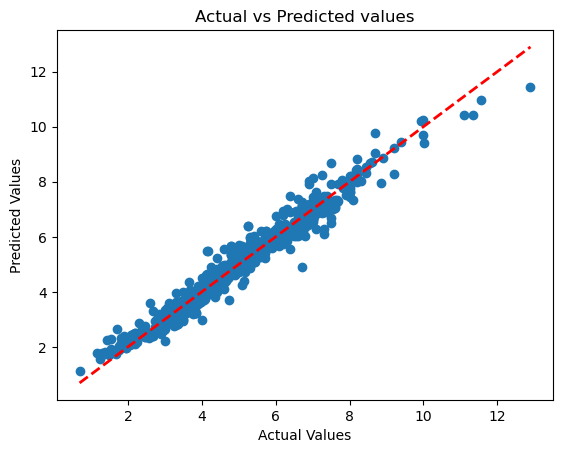

In [8]:
# Actual vs Predicted values
plt.scatter(y, predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonale lijn
plt.title('Actual vs Predicted values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Predict Depth: fill in your specific values here! 

In [9]:
# Fill in the green numbers that correspond to the variable names in red preceding them:

Depth_prediction = results.params['const'] +(results.params['Length Over All']*119.75) +(results.params['Beam Moulded']*19)+(results.params['Draught Design Deadweight']*5.5)
print('This will be the predicted Depth according to the robust OLS model:', Depth_prediction)

This will be the predicted Depth according to the robust OLS model: 9.662202664306525
